In [ ]:
import warnings
from google.colab import drive
warnings.filterwarnings('ignore')

drive.mount('/content/drive')

Mounted at /content/drive


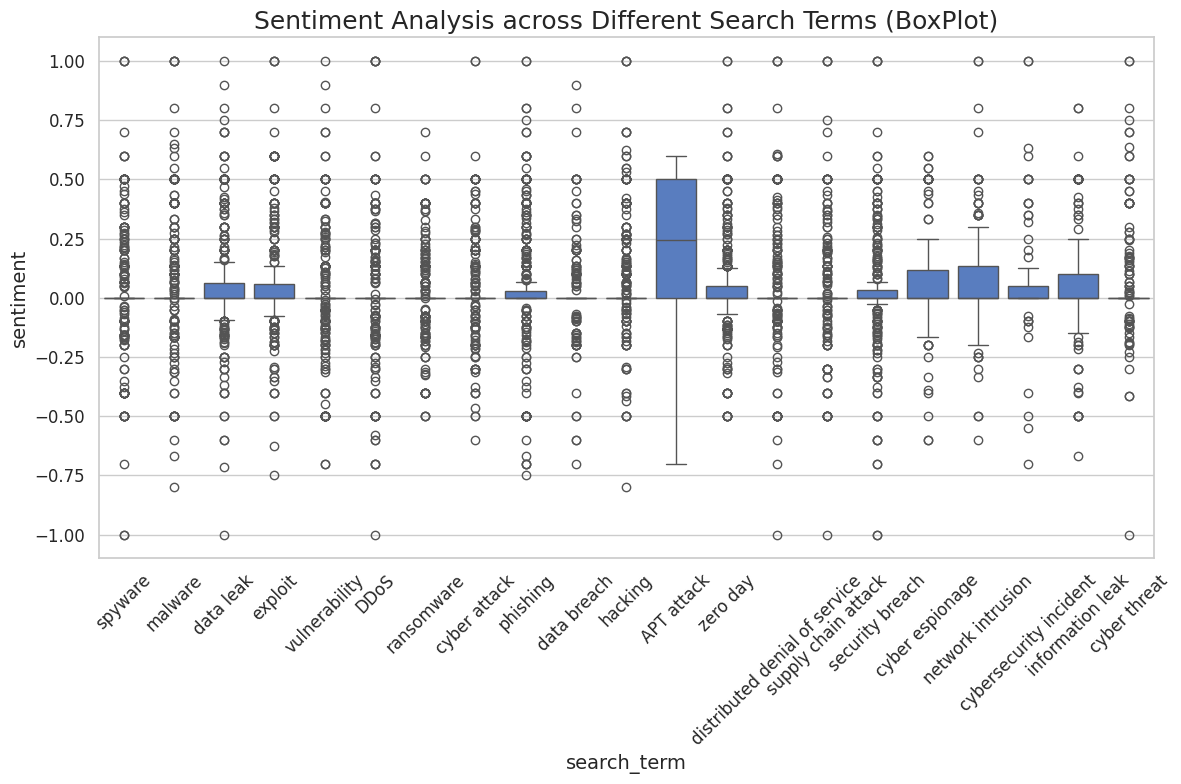

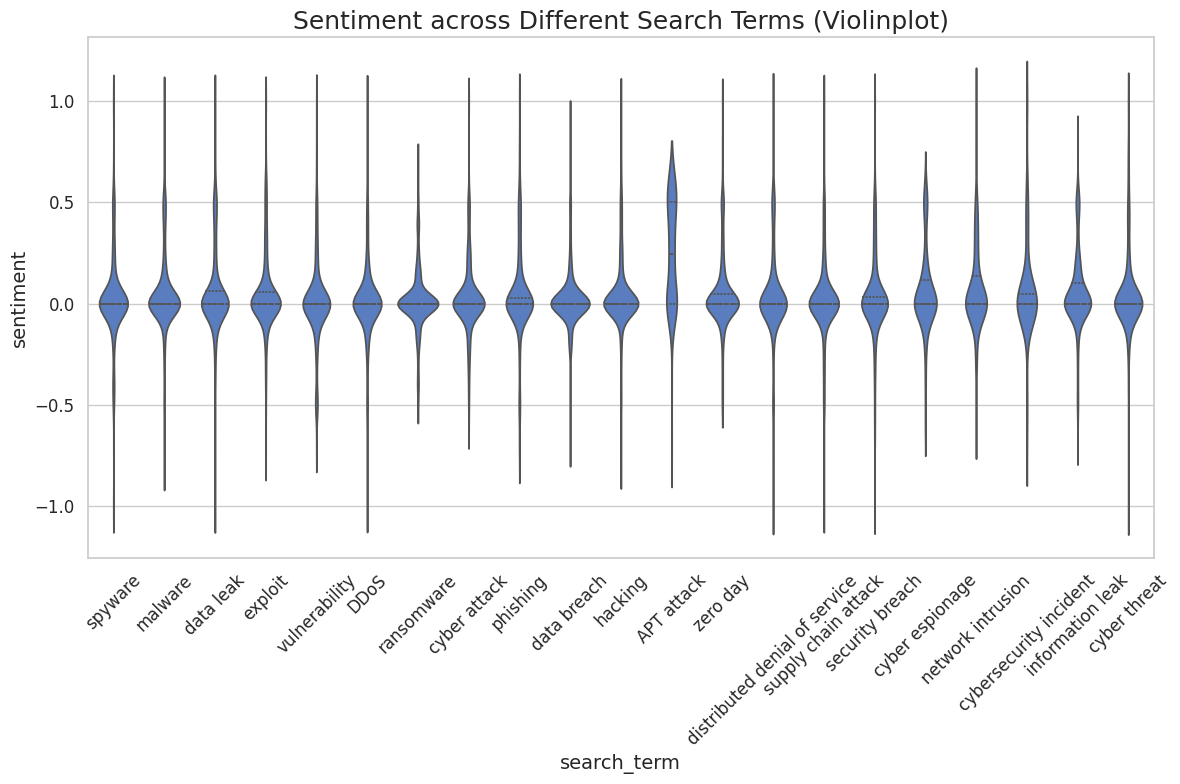

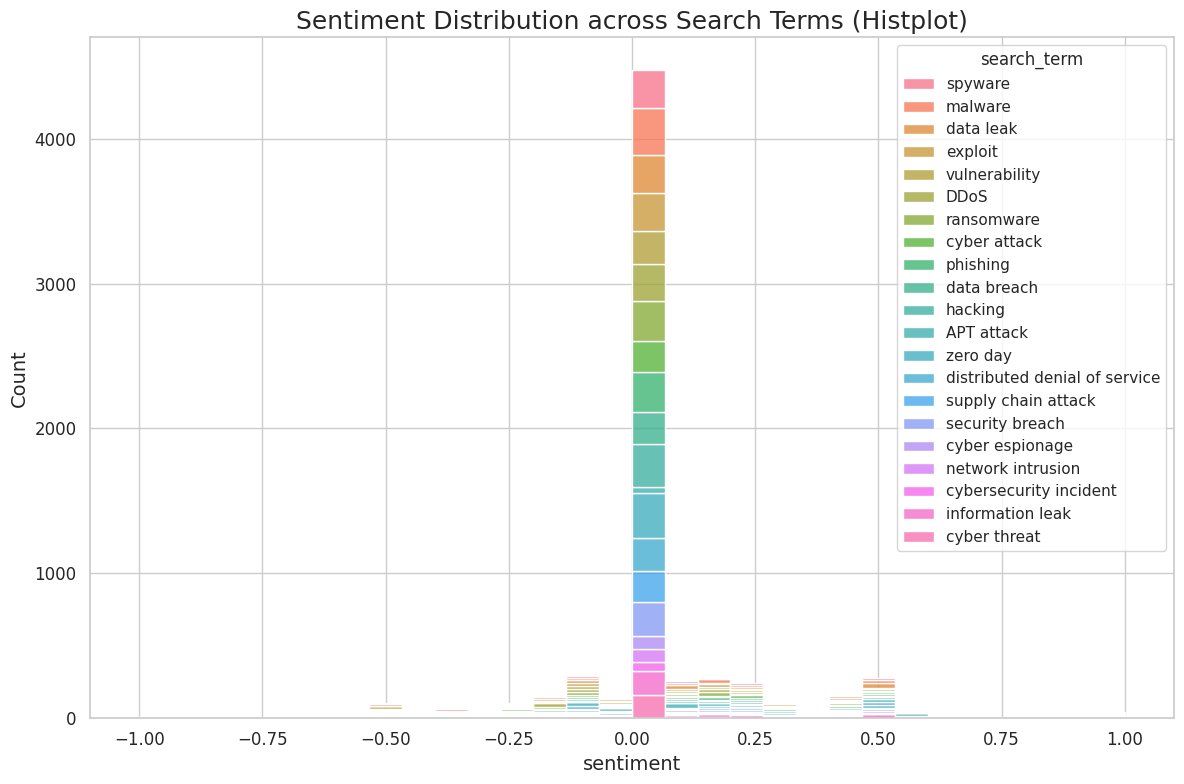

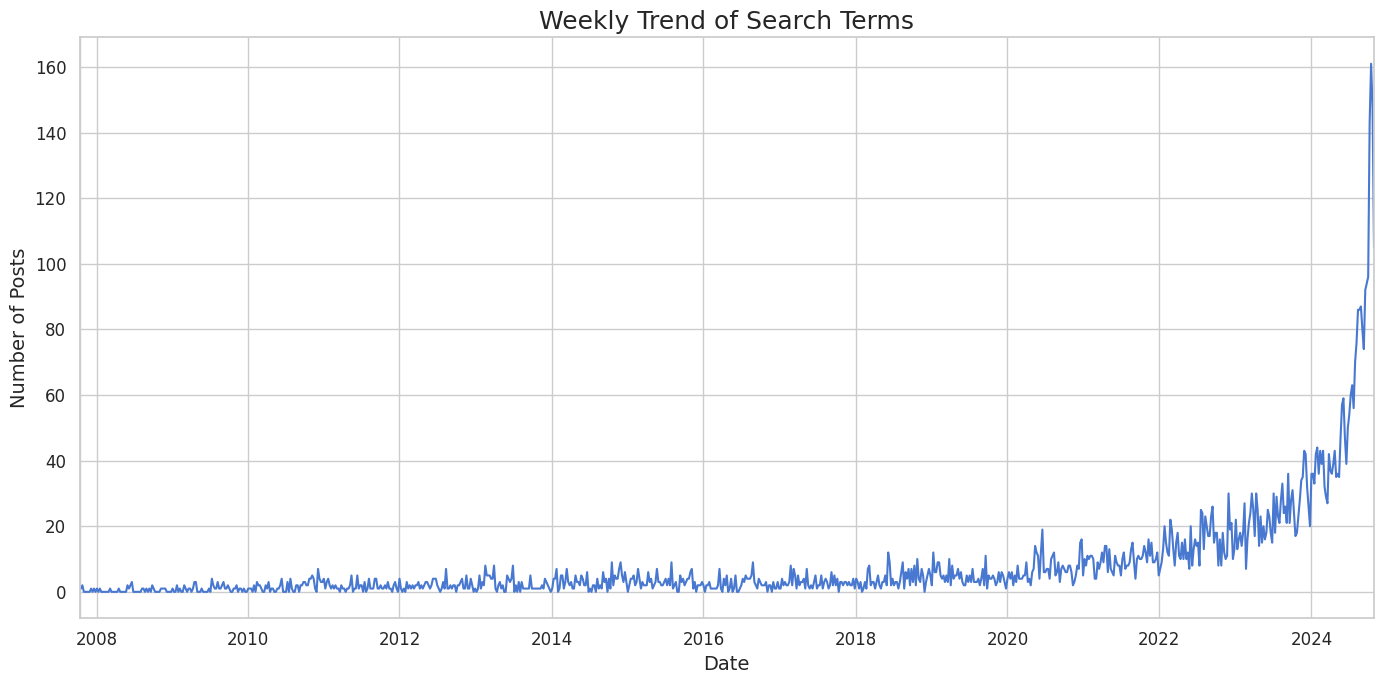

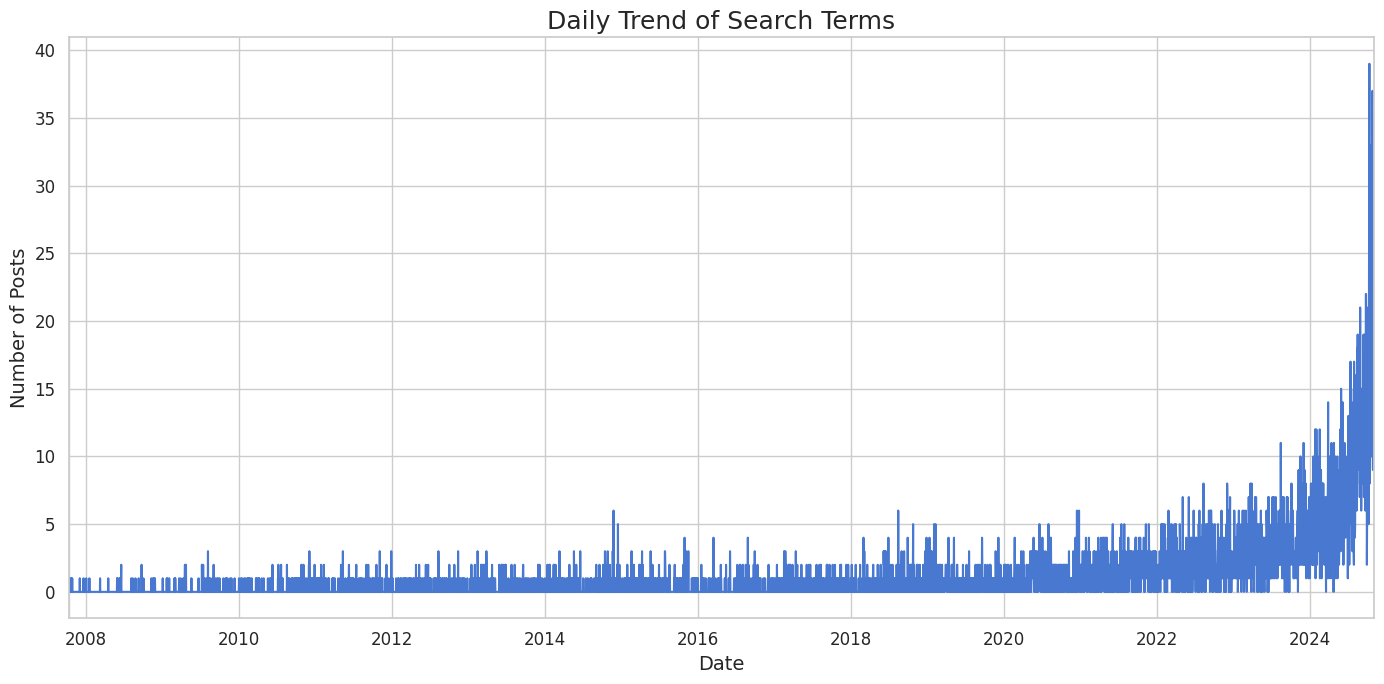

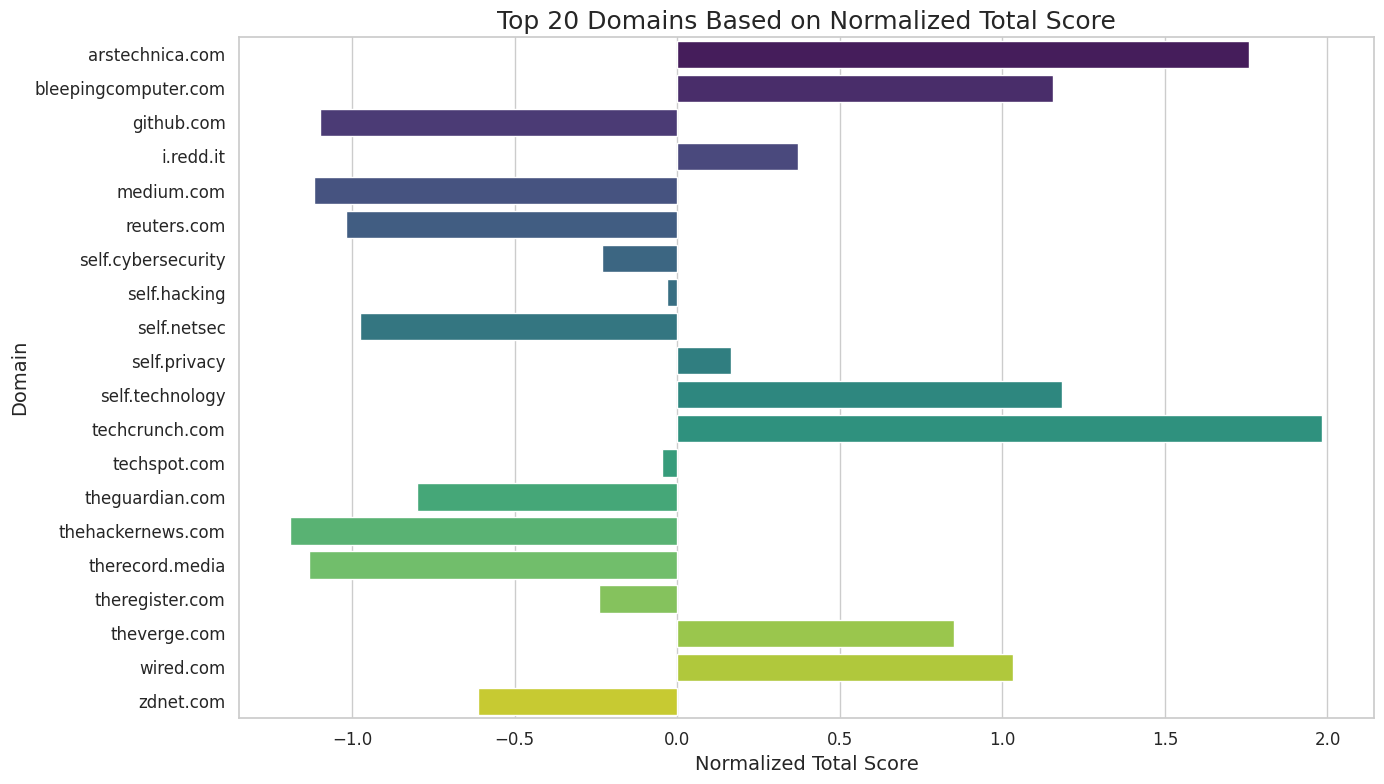

Topic 1:  ['2024', 'attack', 'exploit', 'cve', 'vulnerabilities', 'vulnerability', 'supply', 'chain', 'zero', 'day']
Topic 2:  ['cybersecurity', 'threat', 'hackers', 'attack', 'espionage', 'attacks', 'phishing', 'ddos', 'malware', 'cyber']
Topic 3:  ['million', 'breaches', 'breach', 'leak', 'privacy', 'cyber', 'security', 'attack', 'ransomware', 'data']
Topic 4:  ['private', 'website', 'help', 'information', 'cybersecurity', 'security', 'denial', 'service', 'breach', 'data']
Topic 5:  ['account', 'google', 'just', 'email', 'network', 'android', 'hacked', 'phishing', 'hacking', 'spyware']

--- LDA with 3 Topics ---
Topic 1:  ['cve', 'new', 'use', 'exploiting', 'vulnerabilities', 'google', 'zero', 'day', 'vulnerability', 'spyware']
Topic 2:  ['network', 'espionage', 'attack', 'hackers', 'attacks', 'phishing', 'cybersecurity', 'cyber', 'malware', 'ddos']
Topic 3:  ['leak', 'privacy', 'chain', 'supply', 'ransomware', 'attack', 'cyber', 'breach', 'security', 'data']

--- LDA with 5 Topics -

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
import joblib
import os
import numpy as np
import warnings



warnings.filterwarnings("ignore")

sns.set(style="darkgrid", palette="muted", color_codes=True)
os.makedirs('plots', exist_ok=True)
os.makedirs('models', exist_ok=True)


df = pd.read_csv('/content/drive/MyDrive/datasets/cyber-security/cybersecurity_dataset.csv')

required_columns = ['search_term', 'sentiment', 'upvote_ratio', 'num_comments', 'score', 'created_datetime', 'domain', 'title']

for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

def sentiment_analysis(data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='search_term', y='sentiment', data=data)
    plt.xticks(rotation=45)
    plt.title("Sentiment Analysis across Different Search Terms (BoxPlot)")
    plt.tight_layout()
    plt.savefig('plots/sentiment_boxplot.png')
    plt.show()


    plt.figure(figsize=(12, 8))
    sns.violinplot(x='search_term', y='sentiment', data=data, inner='quartile')
    plt.xticks(rotation=45)
    plt.title("Sentiment across Different Search Terms (Violinplot)")
    plt.tight_layout()
    plt.savefig('plots/sentiment_violinplot.png')
    plt.show()


    plt.figure(figsize=(12, 8))
    sns.histplot(data, x='sentiment', hue='search_term', multiple='stack', bins=30)
    plt.title("Sentiment Distribution across Search Terms (Histplot)")
    plt.tight_layout()
    plt.savefig('plots/sentiment_distribution.png')
    plt.show()


def temporal_analysis(data):
    ## Weekly
    data['created_datetime'] = pd.to_datetime(data['created_datetime'])
    data.set_index('created_datetime', inplace=True)
    weekly_counts = data['search_term'].resample('W').count()
    plt.figure(figsize=(14, 7))
    weekly_counts.plot()
    plt.title("Weekly Trend of Search Terms")
    plt.xlabel("Date")
    plt.ylabel("Number of Posts")
    plt.tight_layout()
    plt.savefig('plots/weekly_trend.png')
    plt.show()

    ## Daily
    daily_counts = data['search_term'].resample('D').count()
    plt.figure(figsize=(14, 7))
    daily_counts.plot()
    plt.title("Daily Trend of Search Terms")
    plt.xlabel("Date")
    plt.ylabel("Number of Posts")
    plt.tight_layout()
    plt.savefig('plots/daily_trend.png')
    plt.show()

def domain_reputation_analysis(data):
    ## Top 20 domain's posts combined score

    plt.figure(figsize=(14, 8))
    top_domains = data['domain'].value_counts().nlargest(20).index
    filtered_data = data[data['domain'].isin(top_domains)]
    domain_scores = filtered_data.groupby('domain')['score'].sum().reset_index()
    scaler = StandardScaler()
    domain_scores['normalized_score'] = scaler.fit_transform(domain_scores[['score']])
    sns.barplot(x='normalized_score', y='domain', data=domain_scores, palette='viridis')
    plt.title("Top 20 Domains Based on Normalized Total Score")
    plt.xlabel("Normalized Total Score")
    plt.ylabel("Domain")
    plt.tight_layout()
    plt.savefig('plots/domain_reputation_normalized.png')
    plt.show()

def keyword_extraction_topic_modeling(data, num_topics=5, vectorizer_type='tfidf'):
    if vectorizer_type == 'tfidf':
        vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    elif vectorizer_type == 'count':
        vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    else:
        raise ValueError("vectorizer_type must be either 'tfidf' or 'count'")


    tf_matrix = vectorizer.fit_transform(data['title'].fillna(''))
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tf_matrix)

    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda.components_):
        print(f"Topic {idx + 1}: ", [terms[i] for i in topic.argsort()[-10:]])
    joblib.dump(lda, f'models/lda_{vectorizer_type}_{num_topics}_topics.pkl')

def experiment_topic_numbers(data):
    for num in [3, 5, 7]:
        print(f"\n--- LDA with {num} Topics ---")
        keyword_extraction_topic_modeling(data, num_topics=num, vectorizer_type='tfidf')

def experiment_vectorization_methods(data):
    for vec_type in ['tfidf', 'count']:
        print(f"\n--- Vectorization Method: {vec_type.upper()} ---")
        keyword_extraction_topic_modeling(data, num_topics=5, vectorizer_type=vec_type)

def customize_plot_styles():
    sns.set_style("whitegrid")
    plt.rcParams.update({
        'figure.figsize': (12, 8),
        'axes.titlesize': 18,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
    })

if __name__ == "__main__":
    customize_plot_styles()
    sentiment_analysis(df)
    temporal_analysis(df)
    domain_reputation_analysis(df)
    keyword_extraction_topic_modeling(df, num_topics=5, vectorizer_type='tfidf')
    experiment_topic_numbers(df)
    experiment_vectorization_methods(df)


In [ ]:
"""
Post Popularity Prediction System
--------------------------------
A comprehensive system for predicting and evaluating post popularity using multiple ML models.
Includes classification and regression metrics with visualizations.
"""

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    classification_report
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    ExtraTreesRegressor
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Configuration
MODEL_CONFIGS = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7]
        }
    },
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'epsilon': [0.1, 0.2, 0.5],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': list(range(3, 15)),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'AdaBoost': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'ExtraTrees': {
        'model': ExtraTreesRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    }
}

class PostPopularityPredictor:
    """Main class for post popularity prediction and evaluation"""

    def __init__(self, data):
        """Initialize with a DataFrame containing post data"""
        self.data = data
        self.results = {}
        self.label_encoder = LabelEncoder()
        self.ensure_model_directory()
        self.class_labels = ['Low', 'Medium', 'High']

    @staticmethod
    def ensure_model_directory():
        """Create models directory if it doesn't exist"""
        if not os.path.exists('models'):
            os.makedirs('models')

    def prepare_data(self):
        """Prepare data for modeling"""
        self.data['log_num_comments'] = np.log1p(self.data['num_comments'])
        self.data['log_upvote_ratio'] = np.log1p(self.data['upvote_ratio'])

        features = self.data[[
            'upvote_ratio', 'num_comments', 'sentiment',
            'log_num_comments', 'log_upvote_ratio'
        ]]
        target = self.data['score']

        return train_test_split(
            features, target,
            test_size=0.2,
            random_state=42
        )

    def train_model(self, name, model_config, X_train, y_train):
        """Train a single model with hyperparameter tuning"""
        model = model_config['model']
        params = model_config['params']

        # Handle scaling for specific models
        if name in ['SVR', 'KNN']:
            model = Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', model)
            ])
            params = {f'regressor__{k}': v for k, v in params.items()}

        # Perform hyperparameter tuning if params exist
        if params:
            search = RandomizedSearchCV(
                estimator=model,
                param_distributions=params,
                n_iter=50,
                scoring='r2',
                cv=5,
                verbose=1,
                random_state=42,
                n_jobs=-1
            )
            search.fit(X_train, y_train)
            return search.best_estimator_, search.best_params_

        model.fit(X_train, y_train)
        return model, {}

    def convert_to_classes(self, scores, n_bins=3):
        """
        Convert numerical scores into discrete classes, handling duplicates

        Parameters:
        scores: array-like of numerical values
        n_bins: number of classes to create (default=3)

        Returns:
        numpy.ndarray: Array of class labels (0 to n_bins-1)
        """
        try:
            # Convert to pandas Series if it's not already
            scores_series = pd.Series(scores)

            # Try with duplicates='raise' first
            return pd.qcut(scores_series, q=n_bins, labels=False, duplicates='raise')
        except ValueError:
            # If duplicates exist, handle them
            try:
                # Method 1: Try with duplicates='drop'
                return pd.qcut(scores_series, q=n_bins, labels=False, duplicates='drop')
            except ValueError:
                # Method 2: Use percentile-based binning
                bins = np.percentile(scores_series, np.linspace(0, 100, n_bins + 1))
                bins[0] = float('-inf')  # Ensure smallest value is included
                bins[-1] = float('inf')  # Ensure largest value is included
                return np.digitize(scores_series, bins[1:-1]) - 1

    def plot_detailed_confusion_matrix(self, y_true, y_pred, model_name):
        """Create and save a detailed confusion matrix visualization"""
        y_true_classes = self.convert_to_classes(y_true)
        y_pred_classes = self.convert_to_classes(y_pred)

        # Calculate matrices
        cm = confusion_matrix(y_true_classes, y_pred_classes)
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        # Create visualizations
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

        # Plot absolute numbers
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
        ax1.set_xlabel('Predicted')
        ax1.set_ylabel('Actual')
        ax1.set_title(f'Confusion Matrix - Absolute Numbers\n{model_name}')
        ax1.xaxis.set_ticklabels(self.class_labels)
        ax1.yaxis.set_ticklabels(self.class_labels)

        # Plot percentages
        sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', ax=ax2)
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Actual')
        ax2.set_title(f'Confusion Matrix - Percentages\n{model_name}')
        ax2.xaxis.set_ticklabels(self.class_labels)
        ax2.yaxis.set_ticklabels(self.class_labels)

        plt.tight_layout()
        plt.savefig(f'models/{model_name}_confusion_matrix.png')
        plt.close()

        # Print analysis
        print("\nConfusion Matrix Analysis:")
        print("\nAbsolute Numbers:")
        print(pd.DataFrame(cm, columns=self.class_labels, index=self.class_labels))
        print("\nPercentages:")
        print(pd.DataFrame(cm_percent, columns=self.class_labels, index=self.class_labels).round(2))

        return cm, cm_percent

    def plot_roc_curve(self, model, X_test, y_test, name):
        """Plot and save ROC curve"""
        plt.figure(figsize=(10, 8))
        y_true_classes = self.convert_to_classes(y_test)

        try:
            if hasattr(model, "predict_proba"):
                y_scores = model.predict_proba(X_test)
                for i in range(len(self.class_labels)):
                    fpr, tpr, _ = roc_curve(
                        (y_true_classes == i).astype(int),
                        y_scores[:, i]
                    )
                    roc_auc = auc(fpr, tpr)
                    plt.plot(
                        fpr, tpr,
                        label=f'{self.class_labels[i]} (AUC = {roc_auc:.2f})'
                    )

            plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curves - {name}')
            plt.legend(loc="lower right")
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.savefig(f'models/{name}_roc_curve.png')
            plt.close()

        except Exception as e:
            print(f"Warning: Could not generate ROC curve - {str(e)}")

    def evaluate_model(self, model, X_test, y_test, y_pred, name):
        """Comprehensive model evaluation with error handling"""
        print(f"\nEvaluating {name}...")

        try:
            # Plot visualizations
            self.plot_detailed_confusion_matrix(y_test, y_pred, name)
            self.plot_roc_curve(model, X_test, y_test, name)

            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)

            # Print metrics
            print("\nRegression Metrics:")
            print(f"Mean Squared Error (MSE): {mse:.3f}")
            print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
            print(f"Mean Absolute Error (MAE): {mae:.3f}")
            print(f"R² Score: {r2:.3f}")

            # Calculate class-specific metrics
            y_true_classes = self.convert_to_classes(y_test)
            y_pred_classes = self.convert_to_classes(y_pred)

            print("\nClass-wise Performance:")
            for class_name in self.class_labels:
                mask = y_true_classes == self.class_labels.index(class_name)
                if mask.any():
                    class_r2 = r2_score(y_test[mask], y_pred[mask])
                    class_rmse = np.sqrt(mean_squared_error(y_test[mask], y_pred[mask]))
                    print(f"{class_name} Class - R²: {class_r2:.3f}, RMSE: {class_rmse:.3f}")

            # Print classification report
            print("\nClassification Report:")
            print(classification_report(
                y_true_classes,
                y_pred_classes,
                target_names=self.class_labels
            ))

            return mse, r2

        except Exception as e:
            print(f"Error in evaluation: {str(e)}")
            return float('inf'), float('-inf')

    def save_model_results(self, name, model, mse, r2, best_params):
        """Save model and its results"""
        # Save model
        joblib.dump(model, f'models/{name}_model.pkl')

        # Save metrics
        metrics = {
            'MSE': mse,
            'RMSE': np.sqrt(mse),
            'R2': r2,
            'Best_Parameters': best_params
        }

        # Save to JSON
        with open(f'models/{name}_metrics.json', 'w') as f:
            json.dump(metrics, f, indent=4)

        return metrics

    def train_and_evaluate(self):
        """Main method to train and evaluate all models"""
        X_train, X_test, y_train, y_test = self.prepare_data()

        for name, config in MODEL_CONFIGS.items():
            print(f"\nProcessing {name}...")
            print("=" * 50)

            try:
                # Train model
                model, best_params = self.train_model(
                    name, config, X_train, y_train
                )

                # Make predictions
                y_pred = model.predict(X_test)

                # Evaluate model
                mse, r2 = self.evaluate_model(
                    model, X_test, y_test, y_pred, name
                )

                # Save results
                metrics = self.save_model_results(
                    name, model, mse, r2, best_params
                )

                self.results[name] = metrics

            except Exception as e:
                print(f"Error processing {name}: {str(e)}")

            print("=" * 50)

        self.save_final_results()
        return self.results

    def save_final_results(self):
        """Save and display final results summary"""
        # Create summary dictionary
        summary_dict = {}
        for name, metrics in self.results.items():
            summary_dict[name] = {
                'MSE': metrics.get('MSE', float('nan')),
                'RMSE': np.sqrt(metrics.get('MSE', float('nan'))),
                'R2': metrics.get('R2', float('nan'))
            }

        # Create and save DataFrame
        results_df = pd.DataFrame(summary_dict).T.round(3)
        results_df.to_csv('models/model_performance_summary.csv')

        # Create HTML report
        html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <style>
                .summary-table {{
                    border-collapse: collapse;
                    width: 100%;
                    margin: 20px 0;
                    font-family: Arial, sans-serif;
                }}
                .summary-table th, .summary-table td {{
                    border: 1px solid #ddd;
                    padding: 8px;
                    text-align: left;
                }}
                .summary-table th {{
                    background-color: #4CAF50;
                    color: white;
                }}
                .summary-table tr:nth-child(even) {{
                    background-color: #f2f2f2;
                }}
                .summary-table tr:hover {{
                    background-color: #ddd;
                }}
                .header {{
                    color: #333;
                    margin: 20px 0;
                    font-family: Arial, sans-serif;
                }}
            </style>
        </head>
        <body>
            <h2 class="header">Model Performance Summary</h2>
            {results_df.to_html(classes='summary-table')}
        </body>
        </html>
        """

        with open('models/performance_report.html', 'w') as f:
            f.write(html_content)

        # Print summary
        print("\nFinal Model Performance Summary:")
        print(results_df)
        print("\nResults saved to:")
        print("- models/model_performance_summary.csv")
        print("- models/performance_report.html")

def main(df):
    """Main execution function"""
    try:
        predictor = PostPopularityPredictor(df)
        results = predictor.train_and_evaluate()
        print("\nModel training and evaluation completed successfully!")
        return results
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

if __name__ == "__main__":
    # Assuming df is your DataFrame
    main(df)


Processing RandomForest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Evaluating RandomForest...

Confusion Matrix Analysis:

Absolute Numbers:
        Low  Medium  High
Low     406     103     3
Medium   65     271    95
High      0      97   374

Percentages:
          Low  Medium   High
Low     79.30   20.12   0.59
Medium  15.08   62.88  22.04
High     0.00   20.59  79.41

Regression Metrics:
Mean Squared Error (MSE): 1222284.918
Root Mean Squared Error (RMSE): 1105.570
Mean Absolute Error (MAE): 144.587
R² Score: 0.785

Class-wise Performance:
Low Class - R²: -17.929, RMSE: 7.026
Medium Class - R²: -30.513, RMSE: 42.025
High Class - R²: 0.780, RMSE: 1915.145

Classification Report:
              precision    recall  f1-score   support

         Low       0.86      0.79      0.83       512
      Medium       0.58      0.63      0.60       431
        High       0.79      0.79      0.79       471

    accuracy                           0.74      1414
   macro avg